# Coding KMeans function from scratching

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Calculate the euclidean distance from two vectors.
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Randomly initialize the center points and return these points.
def init_center(data, n_clusters):
    n_samples, n_features = data.shape
    centers = np.zeros((n_clusters, n_features))
    for cluster_index in range(n_clusters):
        index = int(np.random.uniform(0, n_samples))
        centers[cluster_index, :] = data[index, :]
    return centers

# The main function of KMeans.
def KMeans(data, n_clusters):
    n_samples = data.shape[0]
    
    # Initialize cluster label for each sample.
    cluster = np.mat(np.zeros((n_samples, 2)))
    cluster_change = True
    
    # Initialize center points.
    centers = init_center(data, n_clusters)
    while cluster_change:
        cluster_change = False

        # Do loop for each sample.
        for i in range(n_samples):
            min_distance = 100000.0
            min_index = -1

            # Calculate distance from sample to each cluster.
            for cluster_index in range(n_clusters):
                distance = euclidean_distance(centers[cluster_index, :], data[i, :])
                if distance < min_distance:
                    min_distance = distance
                    min_index = cluster_index

            # Update cluster label[index, distance].
            if n_clusters == 1:
                cluster[i, :] = min_index, min_distance ** 2
            if cluster[i, 0] != min_index:
                # If any cluster label changes, it means the KMeans iteration should continue.
                cluster_change = True
                cluster[i, :] = min_index, min_distance ** 2

        # Update new centers
        for cluster_index in range(n_clusters):
            points = data[np.nonzero(cluster[:, 0].A == cluster_index)[0]]
            centers[cluster_index, :] = np.mean(points, axis=0)
    inertia = sum(cluster[:, 1])[0, 0]
    return centers, cluster, inertia

# Make plot image for data which only have 2 features.
def show_2D_cluster(data, n_clusters, centers, cluster):
    n_samples, n_features = data.shape

    # Make marks for the samples.
    mark = ['or', 'ob', 'og', 'ok', 'sr', 'dr', 'pr']
    for i in range(n_samples):
        mark_index = int(cluster[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[mark_index])

    # Make marks for the centers.
    mark = ['Dr', 'Db', 'Dg', 'Dk', 'sb', 'db', 'pb']
    for j in range(n_clusters):
        plt.plot(centers[j, 0], centers[j, 1], mark[j])
    plt.show()

# Use elbow method to choose the k value.
def elbow(data):
    ss_error = {}
    centers_cluster = defaultdict(list)
    for k in range(1, 11):
        centers, cluster, inertia = KMeans(data, k)
        ss_error[k] = inertia
        centers_cluster[k] = [centers, cluster]
    return centers_cluster, ss_error

# Show the plot of the result of elbow method.
def show_elbow(ss_error):
    plt.figure(figsize=(14,10))
    plt.title('Elbow plot')
    plt.xlabel('Value of k')
    plt.ylabel('Sum of squared error')
    sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))
    plt.show()

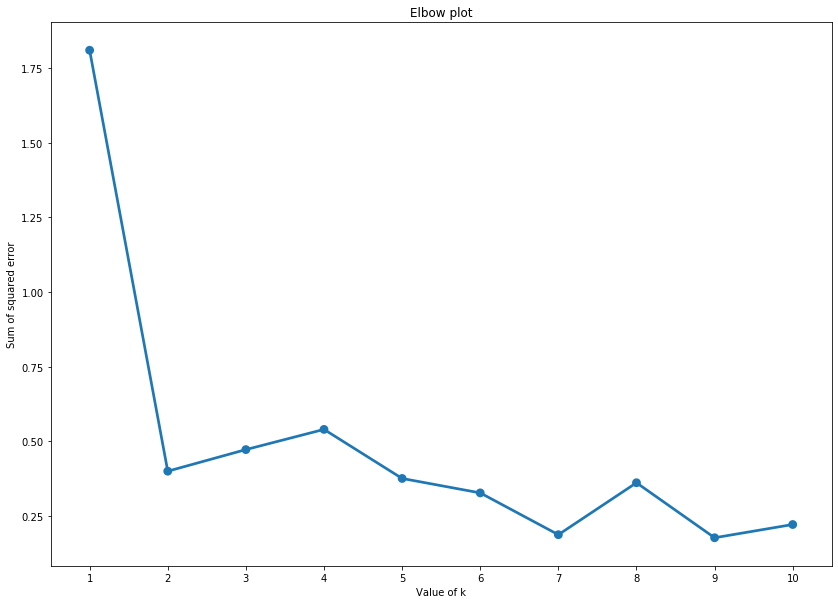

In [20]:
# The dataset of 30 watermelons. It has two features, they are the density and sugar density of watermelons.
watermelon = [
        # 1
        [0.697, 0.460],
        # 2
        [0.774, 0.376],
        # 3
        [0.634, 0.264],
        # 4
        [0.608, 0.318],
        # 5
        [0.556, 0.215],
        # 6
        [0.403, 0.237],
        # 7
        [0.481, 0.149],
        # 8
        [0.437, 0.211],
        # 9
        [0.666, 0.091],
        # 10
        [0.243, 0.267],
        # 11
        [0.245, 0.057],
        # 12
        [0.343, 0.099],
        # 13
        [0.639, 0.161],
        # 14
        [0.657, 0.198],
        # 15
        [0.360, 0.370],
        # 16
        [0.593, 0.042],
        # 17
        [0.719, 0.103],
        # 18
        [0.359, 0.188],
        # 19
        [0.339, 0.241],
        # 20
        [0.282, 0.257],
        # 21
        [0.748, 0.232],
        # 22
        [0.714, 0.346],
        # 23
        [0.483, 0.312],
        # 24
        [0.478, 0.437],
        # 25
        [0.525, 0.369],
        # 26
        [0.751, 0.489],
        # 27
        [0.532, 0.472],
        # 28
        [0.473, 0.376],
        # 29
        [0.725, 0.445],
        # 30
        [0.446, 0.459],
    ]

data = np.asarray(watermelon)
centers_cluster, ss_error = elbow(data)
show_elbow(ss_error)

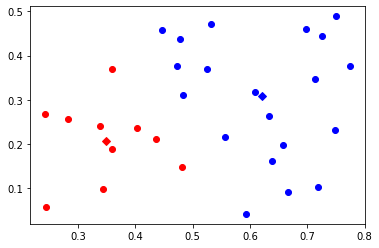

In [12]:
# As we can see, when k = 2, it is a inflection points.
# I will use k = 2 to show the cluster result for the watermelon dataset.
# The diamonds on the image are the centers, the circles on the image are the samples.
show_2D_cluster(data, 2, centers_cluster[2][0], centers_cluster[2][1])